## Importación modulos y dataset

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [17]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv("../conchillas_listo.csv", sep=",", low_memory=False)

In [4]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo
0,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU
1,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU
2,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU
3,99,22,6.50,1.94,12.81,9.80,7.60,5.68,5.26,LU
4,99,23,5.42,1.50,12.17,8.80,7.17,5.57,5.14,LU


In [23]:
data.dtypes

Lote           int64
Individuo      int64
AE           float64
LE           float64
AT           float64
LT           float64
AA           float64
LA           float64
NV           float64
Morfotipo     object
dtype: object

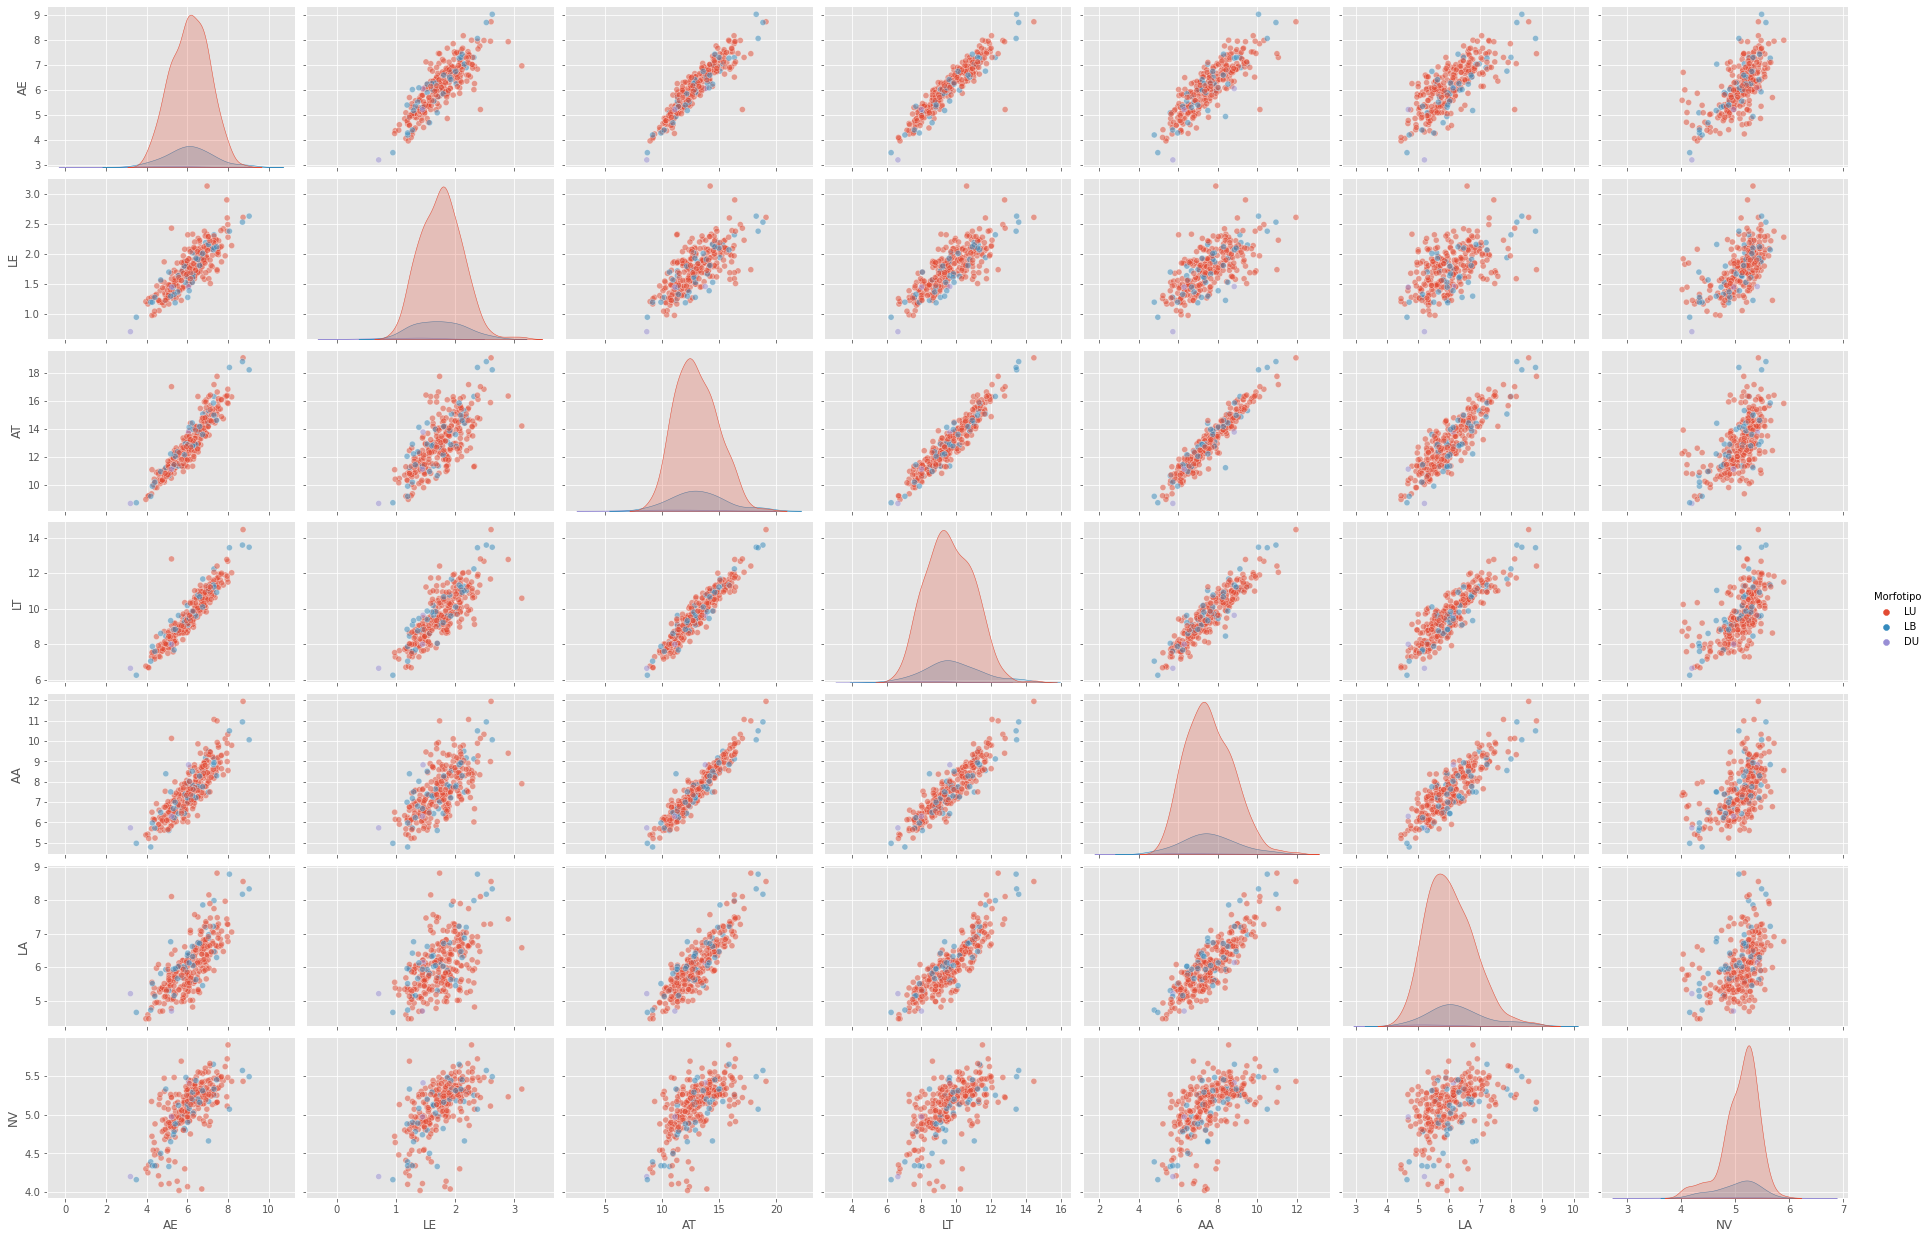

In [29]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

## Prueba Kmeans

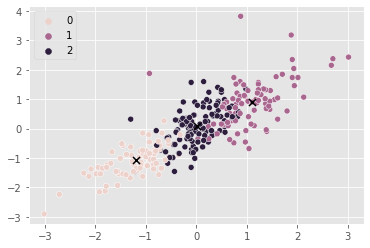

In [30]:
x = data[['AE','LE','AT','LT','AA','LA','NV']], axis=1)
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

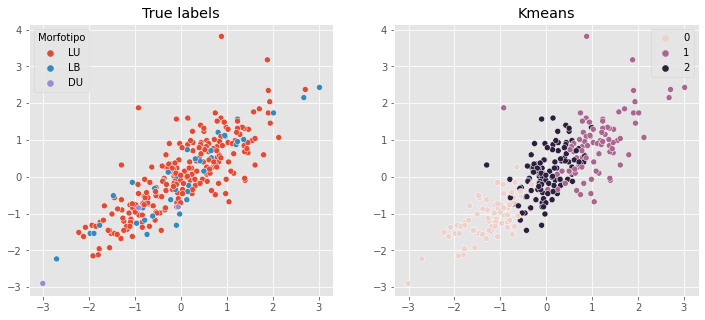

In [32]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [ ]:
#no puede comparar etiquetas de letras con etiquetas numéricas
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f",yticklabels=['Benigno','Maligno']);

#print(classification_report(y_true,labels))